<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M08-deep-learning/AT%26T_logo_2016.svg" alt="AT&T LOGO" width="50%" />

# Orange SPAM detector

## Company's Description 📇

AT&T Inc. is an American multinational telecommunications holding company headquartered at Whitacre Tower in Downtown Dallas, Texas. It is the world's largest telecommunications company by revenue and the third largest provider of mobile telephone services in the U.S. As of 2022, AT&T was ranked 13th on the Fortune 500 rankings of the largest United States corporations, with revenues of $168.8 billion! 😮

## Project 🚧

One of the main pain point that AT&T users are facing is constant exposure to SPAM messages.

AT&T has been able to manually flag spam messages for a time, but they are looking for an automated way of detecting spams to protect their users.

## Goals 🎯

Your goal is to build a spam detector, that can automatically flag spams as they come based sollely on the sms' content.

## Scope of this project 🖼️

To start off, AT&T would like you to use the folowing dataset:

[Dowload the Dataset](https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv)

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Start simple
A good deep learing model does not necessarily have to be super complicated!

### Transfer learning
You do not have access to a whole lot of data, perhaps channeling the power of a more sophisticated model trained on billions of observations might help!

## Deliverable 📬

To complete this project, your team should: 

* Write a notebook that runs preprocessing and trains one or more deep learning models in order to predict the spam or ham nature of the sms
* State the achieved performance clearly

In [75]:
# Import Tensorflow & Pathlib librairies
import tensorflow as tf 
import pathlib 
import pandas as pd 
import os
import io
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [76]:
# Import dataset with Pandas 
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv", error_bad_lines=False, encoding='iso-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [77]:
dataset = dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [78]:
dataset['v1'] = dataset['v1'].apply(lambda x: 0 if x == 'ham' else 1)

In [79]:
!python -m spacy download en_core_web_md -q

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-13 17:25:19.349563: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.8 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [80]:
import en_core_web_md
nlp = en_core_web_md.load()

In [81]:
# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

In [82]:
dataset["review_clean"] = dataset["v2"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))
dataset["review_clean"] = dataset["review_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
dataset["review_clean"] = dataset["review_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

dataset.head()

,v1,v2,review_clean
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


In [83]:
mask = dataset.review_clean.apply(lambda x: type(x)==str)
mask.value_counts()

True    5572
Name: review_clean, dtype: int64

In [84]:
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(dataset.review_clean)
dataset["review_encoded"] = tokenizer.texts_to_sequences(dataset.review_clean)

In [85]:
dataset.head()

,v1,v2,review_clean,review_encoded
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 230, 445, 462, 941, 32, 49, 204, 942, 77, ..."
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[8, 194, 463, 290, 2, 1]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[11, 302, 3, 531, 659, 30, 1, 845, 421, 1, 1, ..."
3,0,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 125, 150, 1, 2, 79]"
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[701, 20, 660, 131]"


In [86]:
reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset.review_encoded, padding="post")

In [87]:
# Train Test Split
xtrain, xval, ytrain, yval = train_test_split(reviews_pad,dataset.v1, test_size=0.3)

In [88]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [89]:
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [90]:
 # Regardons un batch 
for review, star in train_batch.take(1):
  print(review, star)

tf.Tensor(
[[523   1 442 ...   0   0   0]
 [524 324   0 ...   0   0   0]
 [832   2  13 ...   0   0   0]
 ...
 [975 624   1 ...   0   0   0]
 [ 19   1   1 ...   0   0   0]
 [  2 545   1 ...   0   0   0]], shape=(64, 74), dtype=int32) tf.Tensor(
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0], shape=(64,), dtype=int64)


In [91]:
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 8, input_shape=[review.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(16, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 74, 8)             8008      
                                                                 
 global_average_pooling1d_5   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8,169
Trainable params: 8,169
Non-trainable params: 0
_________________________________________________________________


In [93]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [94]:
history = model.fit(train_batch, 
                    epochs=50, 
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 2s 10ms/step - loss: 0.6358 - accuracy: 0.8646 - val_loss: 0.5590 - val_accuracy: 0.8690
Epoch 2/50
61/61 [==============================] - 0s 5ms/step - loss: 0.4804 - accuracy: 0.8646 - val_loss: 0.4051 - val_accuracy: 0.8690
Epoch 3/50
61/61 [==============================] - 0s 4ms/step - loss: 0.3808 - accuracy: 0.8646 - val_loss: 0.3579 - val_accuracy: 0.8690
Epoch 4/50
61/61 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8646 - val_loss: 0.3454 - val_accuracy: 0.8690
Epoch 5/50
61/61 [==============================] - 0s 6ms/step - loss: 0.3466 - accuracy: 0.8646 - val_loss: 0.3307 - val_accuracy: 0.8690
Epoch 6/50
61/61 [==============================] - 0s 7ms/step - loss: 0.3300 - accuracy: 0.8646 - val_loss: 0.3122 - val_accuracy: 0.8690
Epoch 7/50
61/61 [==============================] - 0s 7ms/step - loss: 0.3084 - accuracy: 0.8646 - val_loss: 0.2878 - val_accuracy: 0.8690
Epoch 8/50
61/61 [=

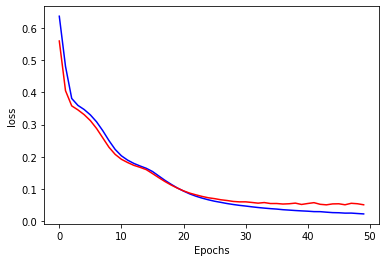

In [100]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

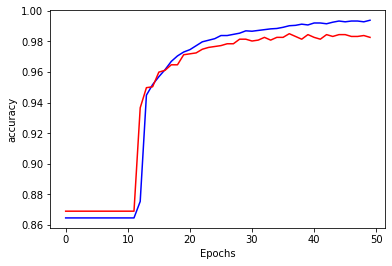

In [102]:
# Visualization of accuracy training 
plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("")
plt.xlabel("Epochs")
plt.show()